In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('preci_alt.csv')
df.columns = ['date','value']
df.date = pd.to_datetime(df.date,format='%b %d, %Y')
df.head(3)

,date,value
0,2010-01-01,0.0
1,2010-01-02,0.0
2,2010-01-03,0.0


In [28]:
dfr = df[(df.date.dt.year == 2019 ) & ((df.date.dt.month == 6) | (df.date.dt.month == 7) | (df.date.dt.month == 8))]
dfr.head(3)

,date,value
3438,2019-06-01,0.0
3439,2019-06-02,0.0
3440,2019-06-03,0.0


<AxesSubplot:xlabel='value', ylabel='Density'>

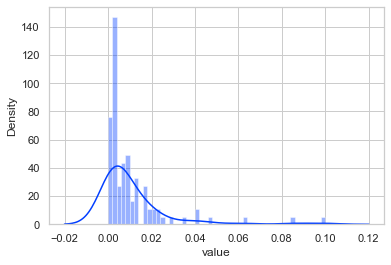

In [29]:
sns.distplot(dfr.value,bins=50)

In [60]:
d = pd.read_csv('cherap.csv')
d.date = pd.to_datetime(d.date,format = '%d-%b-%y')
d

,date,value
0,2000-01-01,0.000
1,2000-01-02,0.000
2,2000-01-03,0.000
3,2000-01-04,0.000
4,2000-01-05,0.000
...,...,...
7296,2019-12-25,0.000
7297,2019-12-26,0.001
7298,2019-12-27,0.006
7299,2019-12-28,0.000


In [87]:
dr = d[(d.date.dt.year == 2019 ) & ((d.date.dt.month == 6) | (d.date.dt.month == 7) | (d.date.dt.month == 8))]
dr

,date,value
7089,2019-06-01,0.012
7090,2019-06-02,0.003
7091,2019-06-03,0.048
7092,2019-06-04,0.023
7093,2019-06-05,0.012
...,...,...
7176,2019-08-27,0.007
7177,2019-08-28,0.021
7178,2019-08-29,0.006
7179,2019-08-30,0.004


<AxesSubplot:xlabel='value', ylabel='Density'>

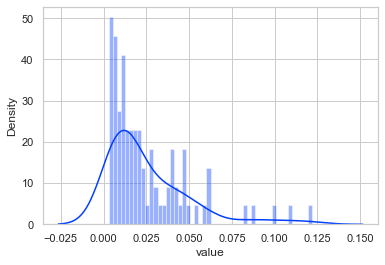

In [53]:
sns.distplot(dr.value,bins=50)

In [77]:
year=d.date.dt.year.unique()
year1 = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
year2 = [2010,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


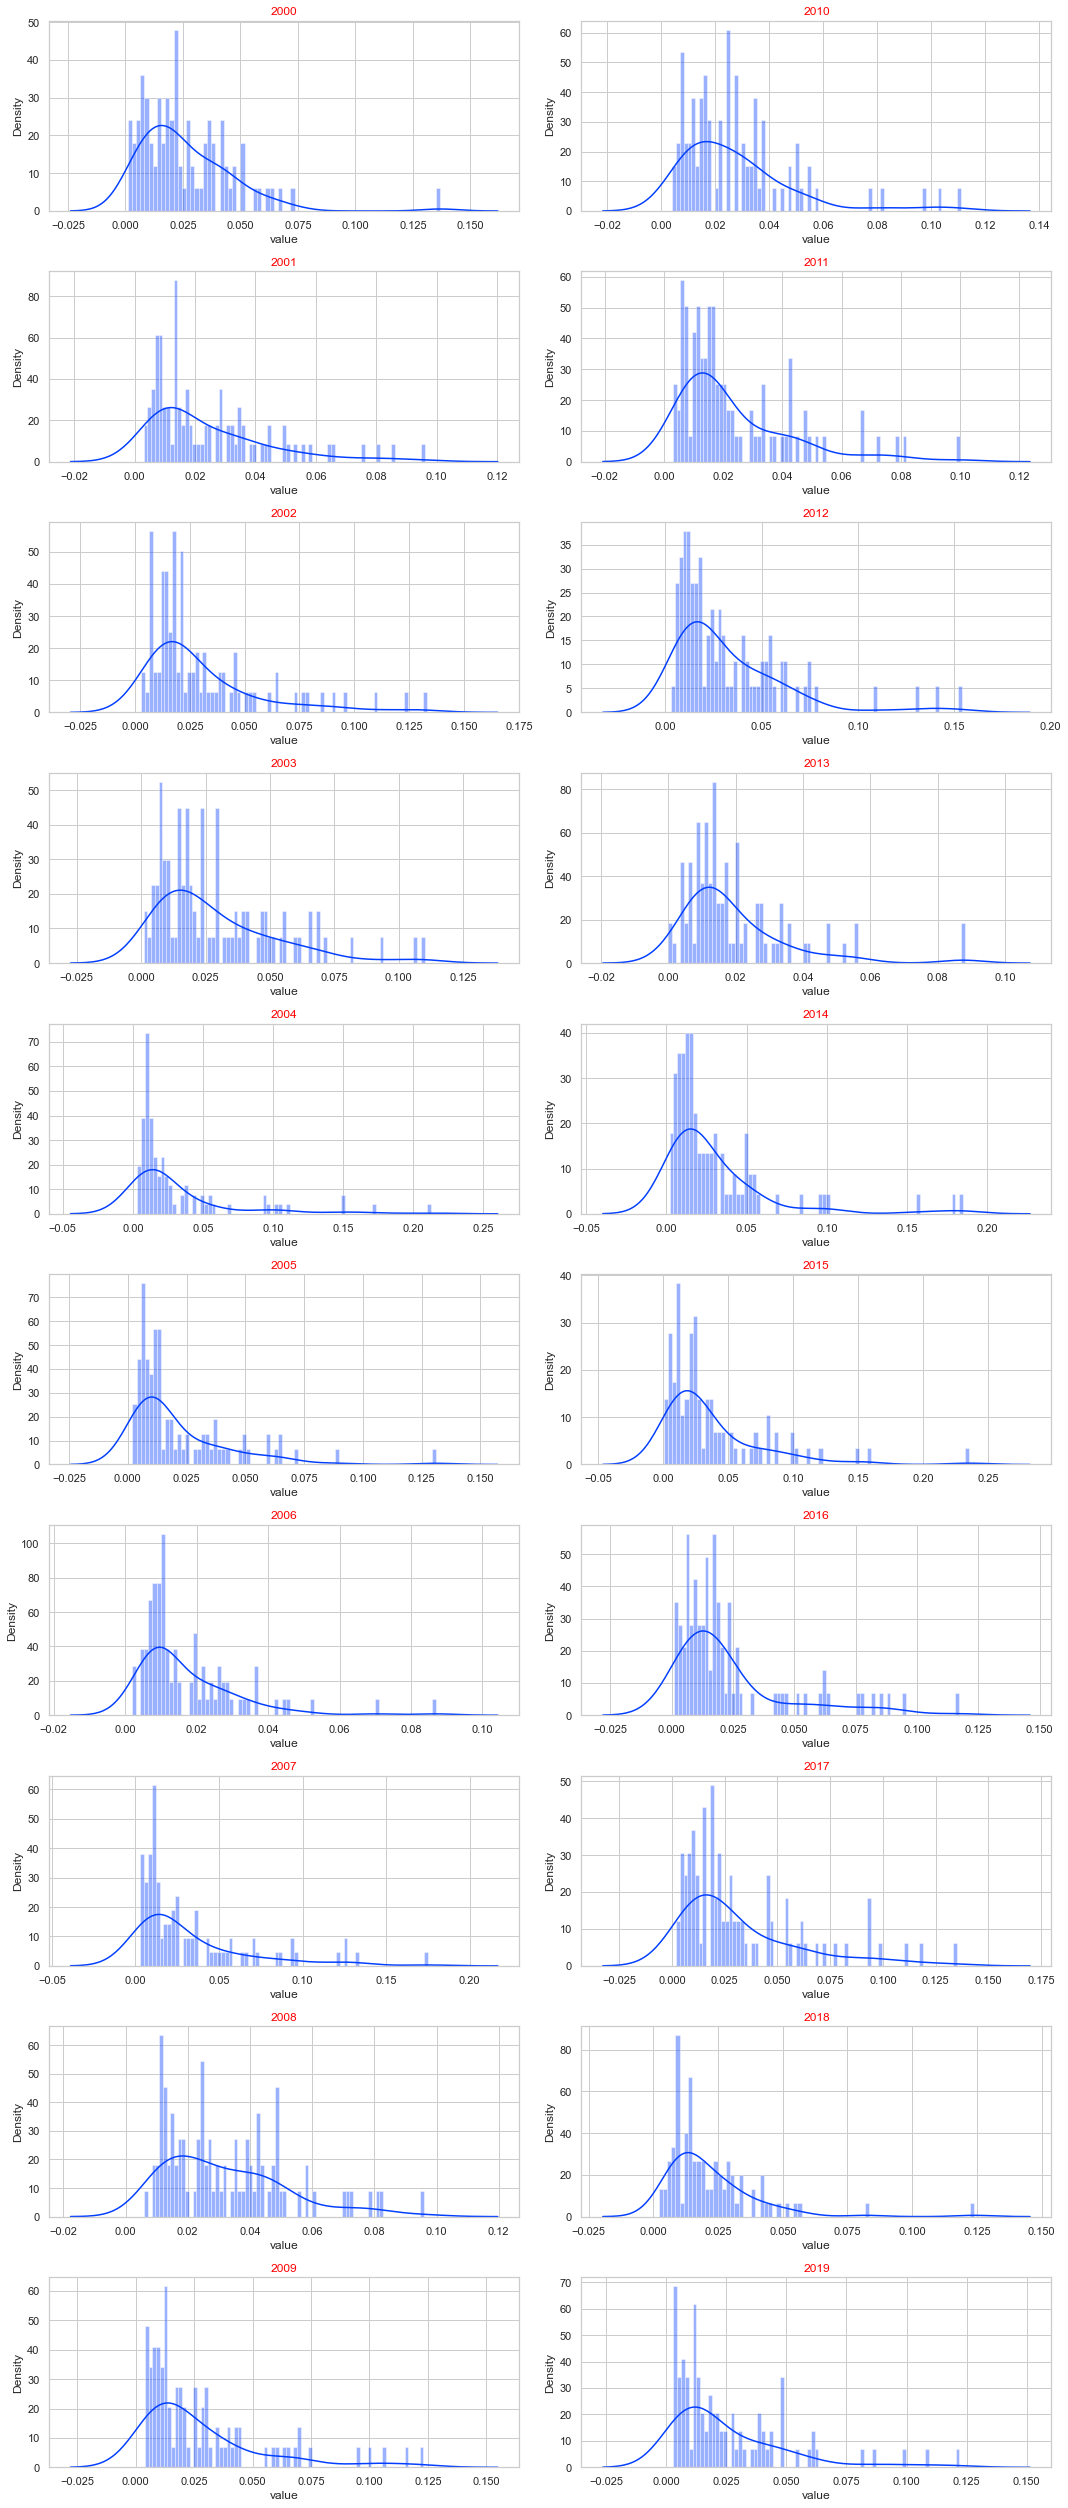

In [86]:
year=d.date.dt.year.unique()
fig,a = plt.subplots(10,2,figsize=(15,35))
print(a)
for i,l in enumerate(year1):
    dd = d[(d.date.dt.year == l) & ((d.date.dt.month == 6) | (d.date.dt.month == 7) | (d.date.dt.month == 8))]
    sns.distplot(dd.value,bins=75,ax=a[i][0])
    plt.tight_layout()
    a[i][0].set_title(l,c='red')
for i,l in enumerate(year2):
    dd = d[(d.date.dt.year == l) & ((d.date.dt.month == 6) | (d.date.dt.month == 7) | (d.date.dt.month == 8))]
    sns.distplot(dd.value,bins=75,ax=a[i][1])
    plt.tight_layout()
    a[i][1].set_title(l,c='red')    

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


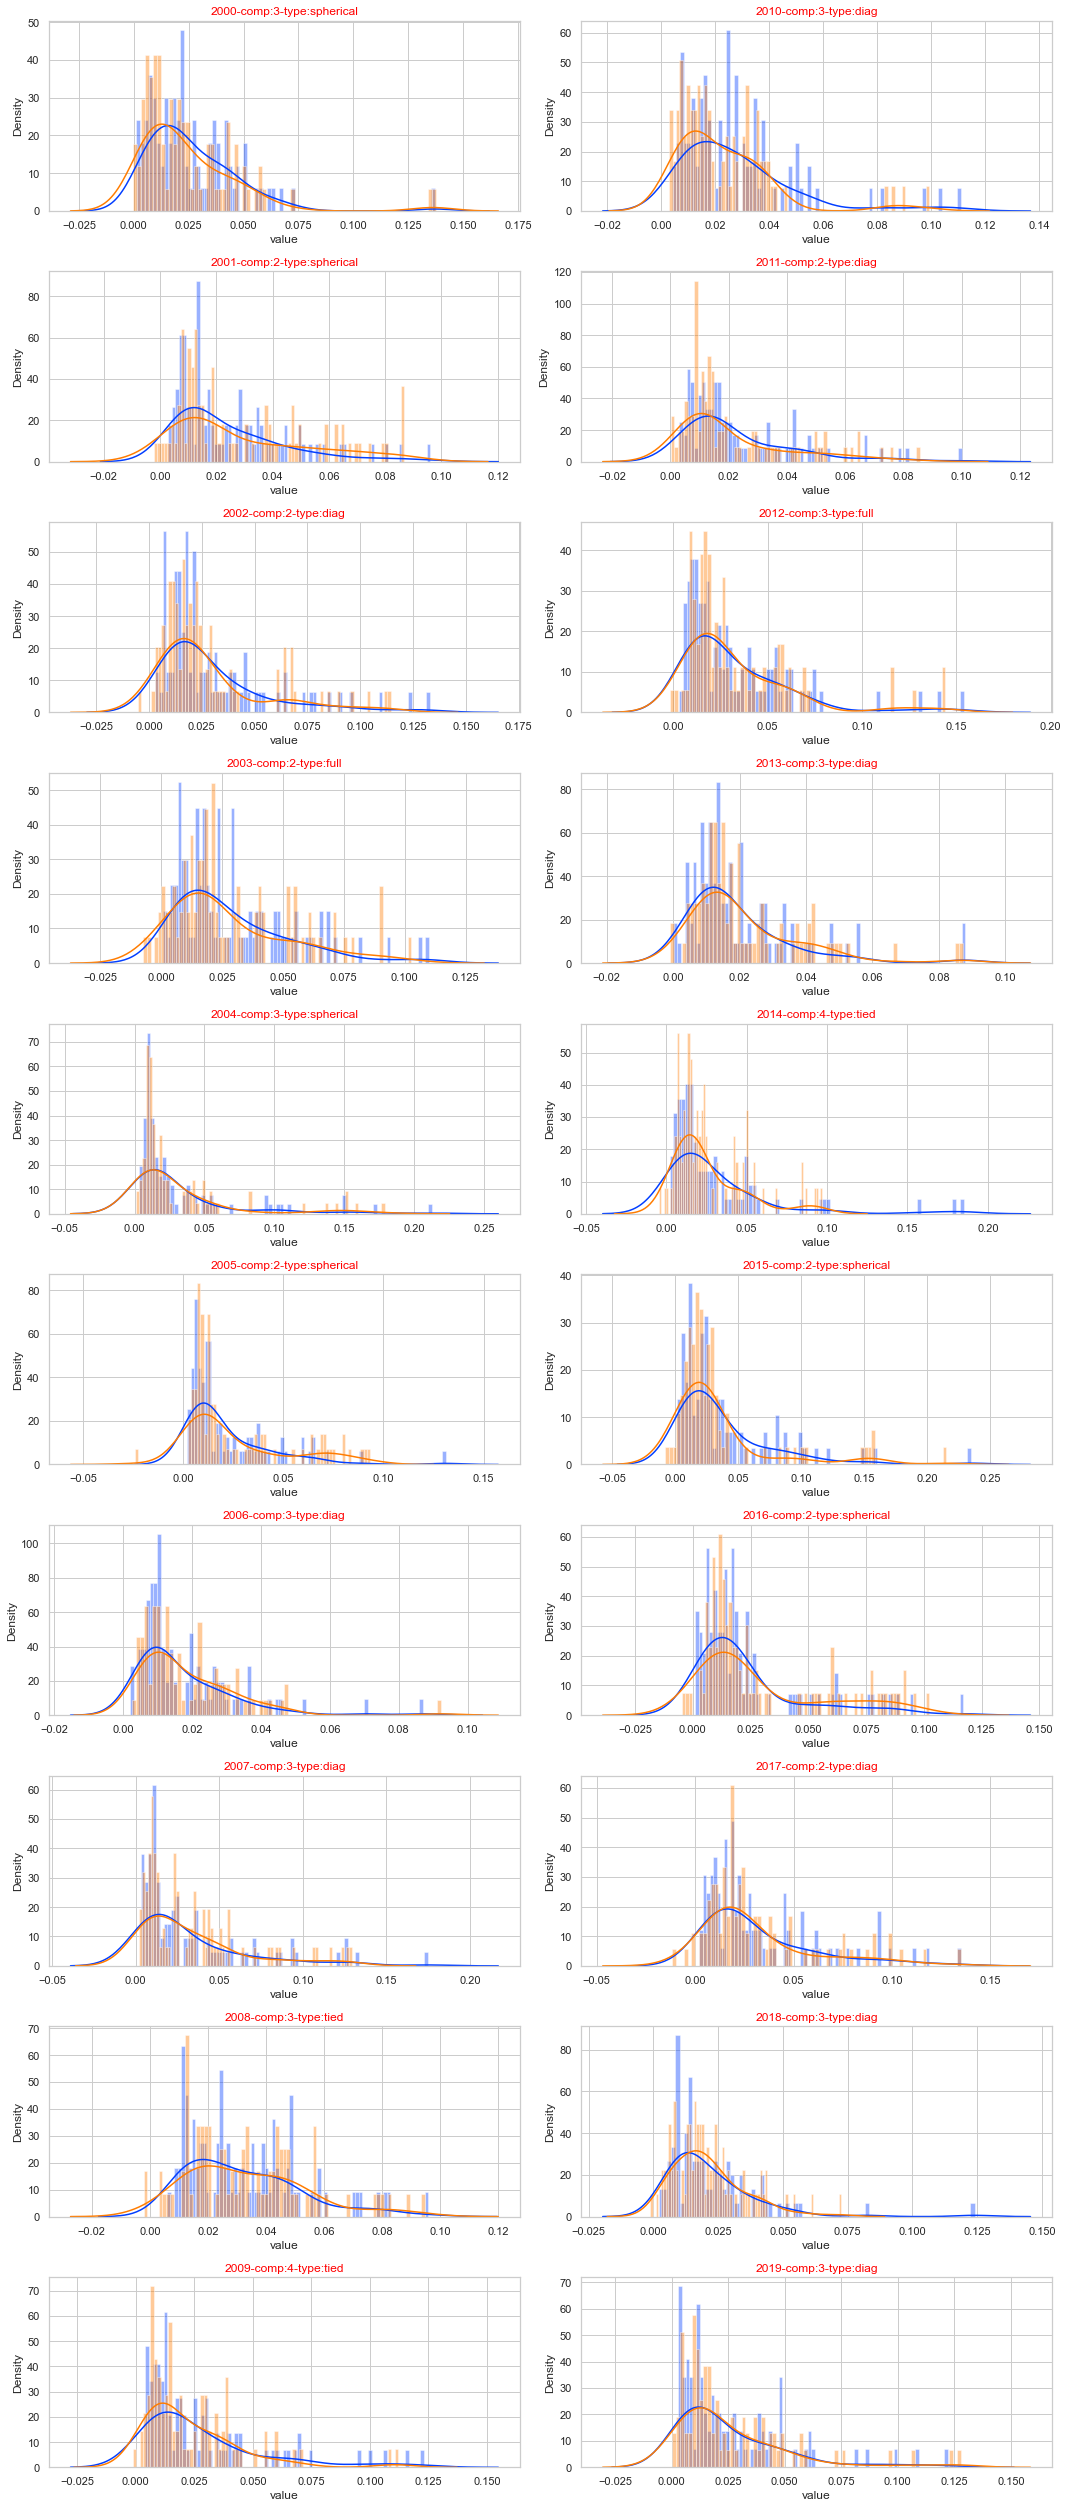

In [98]:
year=d.date.dt.year.unique()
fig,a = plt.subplots(10,2,figsize=(15,35))
print(a)
for i,l in enumerate(year1):
    dd = d[(d.date.dt.year == l) & ((d.date.dt.month == 6) | (d.date.dt.month == 7) | (d.date.dt.month == 8))]
    sns.distplot(dd.value,bins=75,ax=a[i][0])
    plt.tight_layout()
    a[i][0].set_title(l,c='red')
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
            gmmfit = np.asarray(dd.value)
            gmmfit = gmmfit.reshape(-1,1)
            gmm.fit(gmmfit)
            bic.append(gmm.bic(gmmfit))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    sam,_=best_gmm.sample(92)
    sns.distplot(sam,bins=75,ax=a[i][0])
    #a[i][0].set_title(l + best_gmm.means_,c='red')
    a[i][0].set_title('{}-comp:{}-type:{}'.format(l,best_gmm.n_components,best_gmm.covariance_type),c='red')
for i,l in enumerate(year2):
    dd = d[(d.date.dt.year == l) & ((d.date.dt.month == 6) | (d.date.dt.month == 7) | (d.date.dt.month == 8))]
    sns.distplot(dd.value,bins=75,ax=a[i][1])
    plt.tight_layout()
    a[i][1].set_title(l,c='red')
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
            gmmfit = np.asarray(dd.value)
            gmmfit = gmmfit.reshape(-1,1)
            gmm.fit(gmmfit)
            bic.append(gmm.bic(gmmfit))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    sam,_=best_gmm.sample(92)
    sns.distplot(sam,bins=75,ax=a[i][1])
    #a[i][0].set_title(l + best_gmm.means_,c='red')
    a[i][1].set_title('{}-comp:{}-type:{}'.format(l,best_gmm.n_components,best_gmm.covariance_type),c='red')